# TASK #1: PROJECT OVERVIEW 


![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

# TASK #2: IMPORT LIBRARIES/DATASETS

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random
from google.colab import drive
drive.mount("/content/drive/")


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


![image.png](attachment:image.png)

In [2]:
with open("/content/drive/My Drive/images/traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("/content/drive/My Drive/images/traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("/content/drive/My Drive/images/traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [3]:
x_train,y_train=train['features'],train['labels']

In [4]:
x_valid,y_valid=valid['features'],valid['labels']

In [5]:
x_test,y_test=valid['features'],valid['labels']

# TASK #3: PERFORM IMAGES VISUALIZATION

2

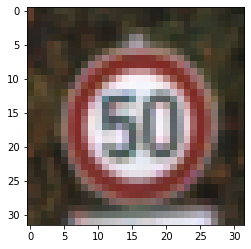

In [6]:
i = np.random.randint(1, len(x_train))
plt.imshow(x_train[i])
y_train[i]

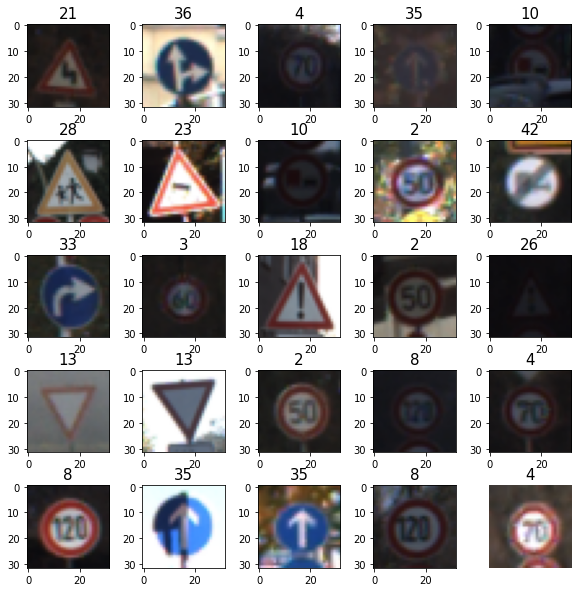

In [7]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 5
L_grid = 5

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))

axes = axes.ravel() # flaten the 5 x 5 matrix into 25 array

n_training = len(x_train) # get the length of the training dataset

# Select a random number from 0 to n_training
# create evenly spaces variables 
for i in range(0,W_grid*L_grid):
  index = np.random.randint(1, n_training)
  axes[i].imshow(x_train[index])
  axes[i].set_title(y_train[index],fontsize=15)
  plt.axis("off")
plt.subplots_adjust(hspace=0.4)

    # Select a random number
    
    # read and display an image with the selected index    
    

        

# TASK #4: CONVERT IMAGES TO GRAYSCALE AND PERFORM NORMALIZATION

In [8]:
from sklearn.utils import shuffle
x_train, y_train = shuffle(x_train, y_train)

In [9]:
x_train_grey=np.sum(x_train/3,axis=3,keepdims=True)

In [10]:
x_test_grey=np.sum(x_test/3,axis=3,keepdims=True)
x_val_grey=np.sum(x_valid/3,axis=3,keepdims=True)

In [11]:
x_train_norm=(x_train_grey-128)/128
x_test_norm=(x_test_grey-128)/128
x_val_norm=(x_val_grey-128)/128

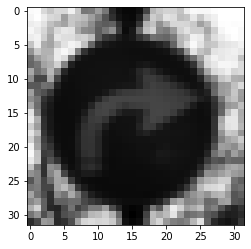

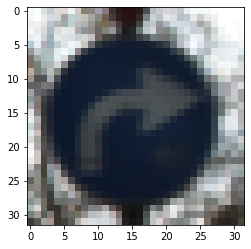

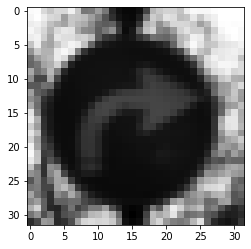

In [12]:
i = random.randint(1, len(x_train_grey))
plt.imshow(x_train_grey[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(x_train[i])
plt.figure()
plt.imshow(x_train_grey[i].squeeze(), cmap = 'gray')

# TASK #5: UNDERSTAND THE THEORY AND INTUITION BEHIND CONVOLUTIONAL NEURAL NETWORKS 

![image.png](attachment:image.png)

![image.png](attachment:image.png)

# TASK #6: BUILD DEEP CONVOLUTIONAL NEURAL NETWORK MODEL

In [13]:
from tensorflow.keras import datasets, layers, models
model=models.Sequential()
model.add(layers.Conv2D(6,(5,5),activation="relu",input_shape=(32,32,1)))
model.add(layers.AveragePooling2D())
model.add(layers.Dropout(0.3))


model.add(layers.Conv2D(16,(5,5),activation="relu",input_shape=(32,32,1)))
model.add(layers.AveragePooling2D())
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())

model.add(layers.Dense(120,activation="relu"))
model.add(layers.Dropout(0.3))

model.add(layers.Dense(84,activation="relu"))
model.add(layers.Dropout(0.3))

model.add(layers.Dense(43,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0

# TASK #7: COMPILE AND TRAIN DEEP CNN MODEL

In [14]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [15]:
hist=model.fit(x_train_grey,y_train,
               batch_size=64,
               epochs=20,
               shuffle=True,
               validation_data=(x_val_grey,y_valid),
               verbose=1)

Epoch 1/20
544/544 [==============================] - 2s 4ms/step - loss: 3.9387 - accuracy: 0.1022 - val_loss: 2.4874 - val_accuracy: 0.3943
Epoch 2/20
544/544 [==============================] - 2s 3ms/step - loss: 2.0321 - accuracy: 0.4316 - val_loss: 1.2185 - val_accuracy: 0.6751
Epoch 3/20
544/544 [==============================] - 2s 3ms/step - loss: 1.3603 - accuracy: 0.5978 - val_loss: 0.8076 - val_accuracy: 0.7739
Epoch 4/20
544/544 [==============================] - 2s 3ms/step - loss: 1.0297 - accuracy: 0.6879 - val_loss: 0.5182 - val_accuracy: 0.8528
Epoch 5/20
544/544 [==============================] - 2s 3ms/step - loss: 0.8445 - accuracy: 0.7399 - val_loss: 0.4563 - val_accuracy: 0.8703
Epoch 6/20
544/544 [==============================] - 2s 3ms/step - loss: 0.7245 - accuracy: 0.7773 - val_loss: 0.3851 - val_accuracy: 0.8694
Epoch 7/20
544/544 [==============================] - 2s 3ms/step - loss: 0.6471 - accuracy: 0.8011 - val_loss: 0.3373 - val_accuracy: 0.8959
Epoch 

# TASK #8: ASSESS TRAINED CNN MODEL PERFORMANCE 

![image.png](attachment:image.png)

In [16]:
score = model.evaluate(x_test_grey, y_test)
print('Test Accuracy: {}'.format(score[1]))

138/138 [==============================] - 0s 2ms/step - loss: 0.1750 - accuracy: 0.9522
Test Accuracy: 0.9521542191505432


In [17]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [18]:
accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

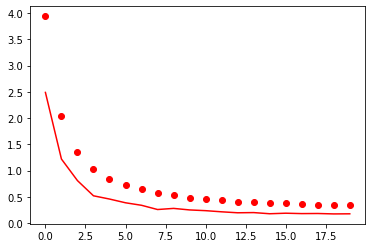

In [19]:
epochs=range(len(accuracy))
plt.plot(epochs,loss,'ro',label="training loss")
plt.plot(epochs,val_loss,'r',label="validation loss")
plt.show()

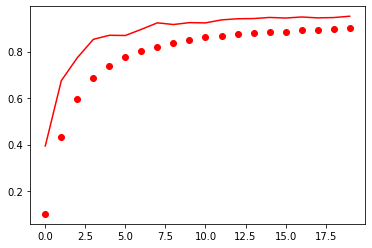

In [20]:
epochs=range(len(accuracy))
plt.plot(epochs,accuracy,'ro',label="training accuracy")
plt.plot(epochs,val_accuracy,'r',label="validation accuracy")
plt.show()

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


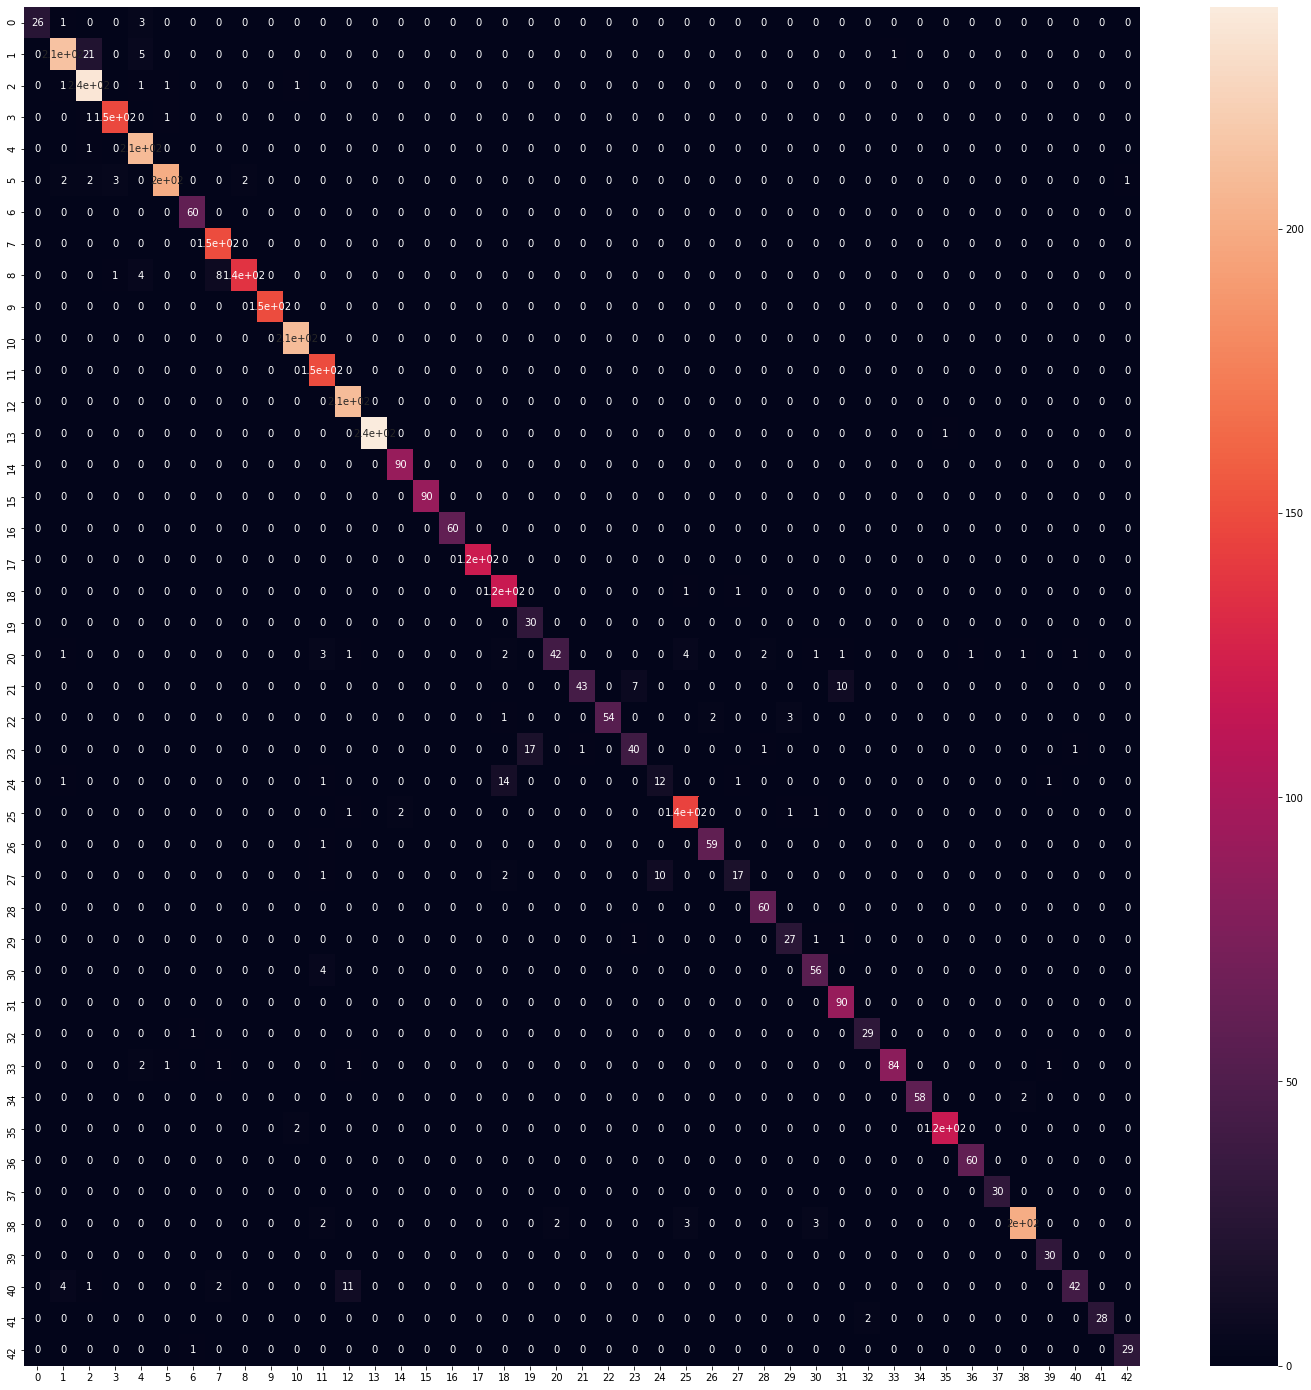

In [21]:
predicted_classes = model.predict_classes(x_test_grey)
y_true = y_test

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

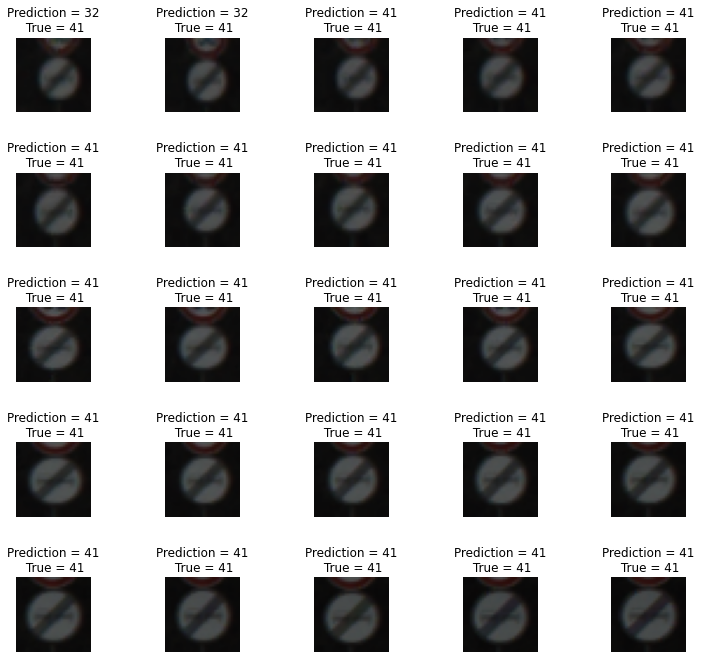

In [22]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(x_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    

# CONGRATULATIONS ON FINISHING THE PROJECT!

# APPENDIX

- In this case study, we want to classify images of traffic signs using deep Convolutional Neural Networks (CNNs).
- The dataset consists of 43 different classes of images. 
- Classes are as listed below: 
  - 0 = Speed limit (20km/h) 
  - 1 = Speed limit (30km/h)
  - 2 = Speed limit (50km/h) 
  - 3 = Speed limit (60km/h)
  - 4 = Speed limit (70km/h) 
  - 5 = Speed limit (80km/h)
  - 6 = End of speed limit (80km/h)
  - 7 = Speed limit (100km/h)
  - 8 = Speed limit (120km/h)
  - 9 = No passing
  - 10 = No passing for vehicles over 3.5 metric tons
  - 11 = Right-of-way at the next intersection
  - 12 = Priority road
  - 13 = Yield
  - 14 = Stop
  - 15 = No vehicles
  - 16 = Vehicles over 3.5 metric tons prohibited
  - 17 = No entry
  - 18 = General caution
  - 19 = Dangerous curve to the left
  - 20 = Dangerous curve to the right
  - 21 = Double curve
  - 22 = Bumpy road
  - 23 = Slippery road
  - 24 = Road narrows on the right
  - 25 = Road work
  - 26 = Traffic signals
  - 27 = Pedestrians
  - 28 = Children crossing 
  - 29 = Bicycles crossing
  - 30 = Beware of ice/snow
  - 31 = Wild animals crossing
  - 32 = End of all speed and passing limits
  - 33 = Turn right ahead
  - 34 = Turn left ahead
  - 35 = Ahead only
  - 36 = Go straight or right
  - 37 = Go straight or left
  - 38 = Keep right
  - 39 = Keep left
  - 40 = Roundabout mandatory
  - 41 = End of no passing
  - 42 = End of no passing by vehicles over 3.5 metric tons

- Citation
J. Stallkamp, M. Schlipsing, J. Salmen, and C. Igel. The German Traffic Sign Recognition Benchmark: A multi-class classification competition. In Proceedings of the IEEE International Joint Conference on Neural Networks, pages 1453–1460. 2011. 
@inproceedings{Stallkamp-IJCNN-2011, author = {Johannes Stallkamp and Marc Schlipsing and Jan Salmen and Christian Igel}, booktitle = {IEEE International Joint Conference on Neural Networks}, title = {The {G}erman {T}raffic {S}ign {R}ecognition {B}enchmark: A multi-class classification competition}, year = {2011}, pages = {1453--1460} }